<a href="https://www.kaggle.com/code/poushalimukherjee/eda-kaggle-playground-s3e2?scriptVersionId=116024074" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Contents
* [Import Libraries](#import-lib)
* [Read Data from File into DataFrame](#read-data)
* [Explore Features](#explore-features)
   - [Create or Transform Features](#create-features)
   - [The _Age_ Feature](#explore-age)
   - [The _Gender_ Feature](#explore-gender)
   - [The _Glucose Level_ & _BMI_ Features](#explore-set1)
   - [Explore Some Basic Stats](#explore-stats1)

<a id="import-lib"></a>
# Import Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<a id="read-data"></a>
# Read data from file into DataFrame

In [2]:
df = pd.read_csv('/kaggle/input/playground-series-s3e2/train.csv')

<a id="explore-features"></a>
# Explore Features of the Dataset

In [3]:
print(
             df.shape
      ,'\n', df.columns
     )

(15304, 12) 
 Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


<a id="create-features"></a>
## A. Create Features or Transform Features as Needed

In [4]:
df['stroke_label'] = df['stroke'].transform(lambda x: "Stroke" if x==1 else "No_Stroke")

<a id="explore-age"></a>
## Exploring the _'age'_ feature

Count of instantes of stroke:  632 
----------------->     Males:  264 
----------------->   Females:  368 
----------------->    Others:  0 
 
Count of instances of no-stroke:  14672 
----------------->        Males:  5593 
----------------->      Females:  9078 
----------------->       Others:  1


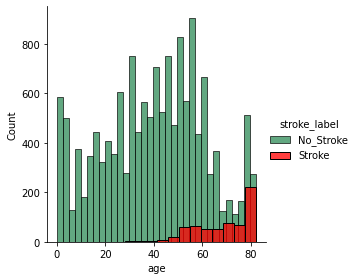

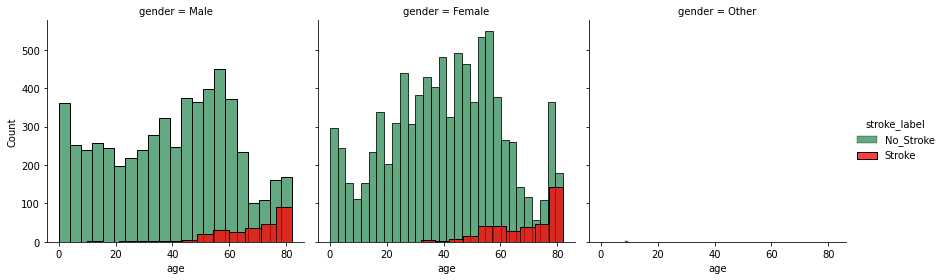

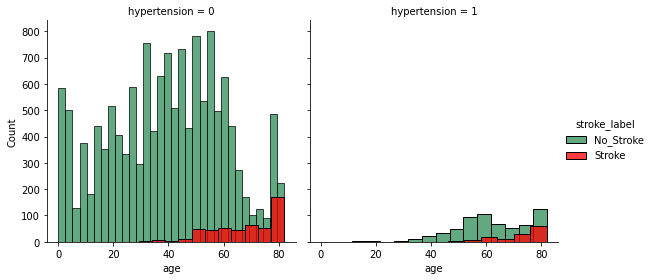

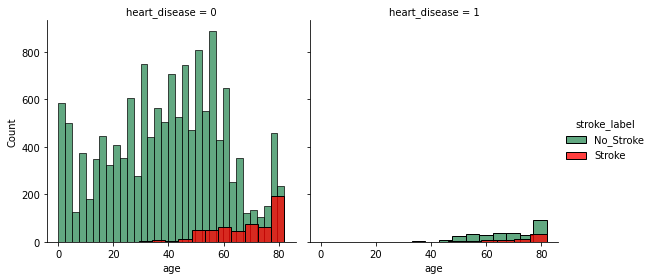

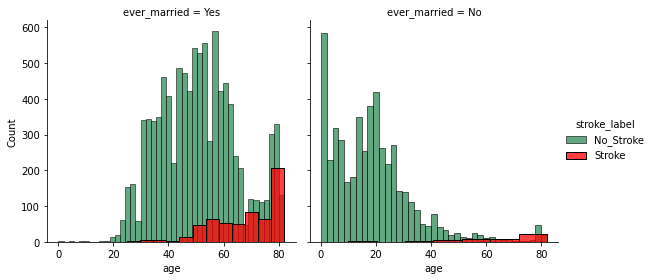

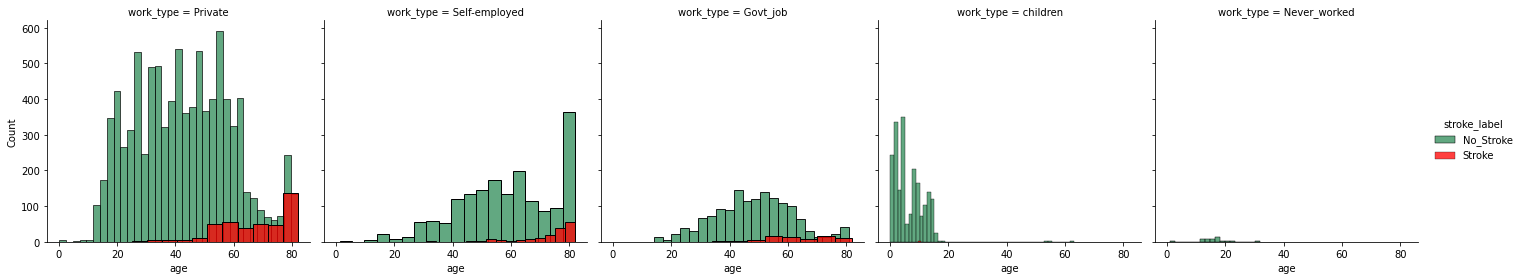

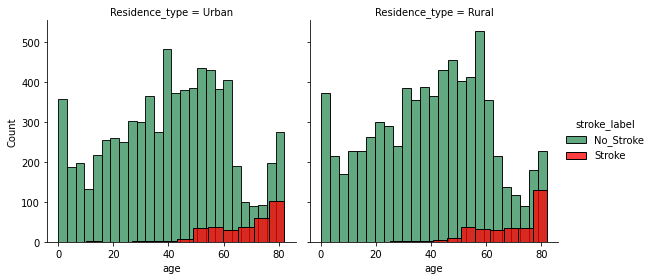

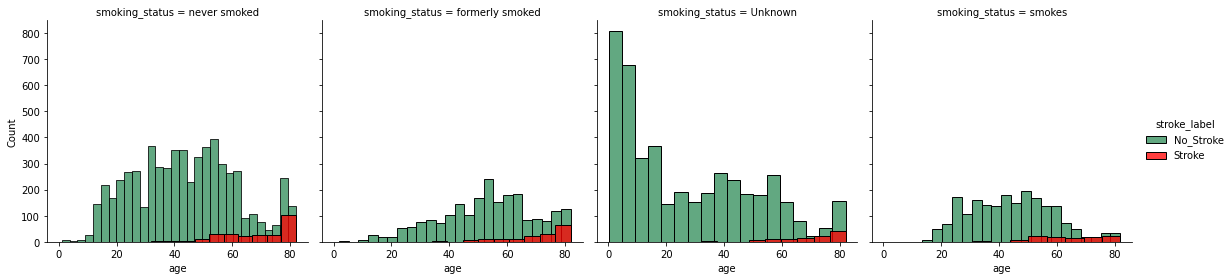

In [5]:
pal = dict(Stroke="red", No_Stroke="seagreen")
g = sns.FacetGrid(df, hue='stroke_label', palette=pal, height=4)
g.map(sns.histplot, "age")
g.add_legend()


g2 = sns.FacetGrid(df, col='gender', hue='stroke_label', palette=pal, height=4)
g2.map(sns.histplot, "age")
g2.add_legend()

g3 = sns.FacetGrid(df, col='hypertension', hue='stroke_label', palette=pal, height=4)
g3.map(sns.histplot, "age")
g3.add_legend()

g4 = sns.FacetGrid(df, col='heart_disease', hue='stroke_label', palette=pal, height=4)
g4.map(sns.histplot, "age")
g4.add_legend()

g5 = sns.FacetGrid(df, col='ever_married', hue='stroke_label', palette=pal, height=4)
g5.map(sns.histplot, "age")
g5.add_legend()

g6 = sns.FacetGrid(df, col='work_type', hue='stroke_label', palette=pal, height=4)
g6.map(sns.histplot, "age")
g6.add_legend()

g7 = sns.FacetGrid(df, col='Residence_type', hue='stroke_label', palette=pal, height=4)
g7.map(sns.histplot, "age")
g7.add_legend()

g8 = sns.FacetGrid(df, col='smoking_status', hue='stroke_label', palette=pal, height=4)
g8.map(sns.histplot, "age")
g8.add_legend()


print("Count of instantes of stroke: ",   df[  df['stroke_label']   =="Stroke"   ].shape[0]
     ,"\n----------------->     Males: ", df[  (df['stroke_label']  =="Stroke") 
                                             & (df['gender']        =="Male")    ].shape[0]
     ,"\n----------------->   Females: ", df[  (df['stroke_label']  =="Stroke") 
                                             & (df['gender']        =="Female")  ].shape[0]
     ,"\n----------------->    Others: ", df[  (df['stroke_label']  =="Stroke") 
                                             & (df['gender']        =="Other")   ].shape[0]
     ,"\n"
     ,"\nCount of instances of no-stroke: ", df[  df['stroke_label']   =="No_Stroke" ].shape[0]
     ,"\n----------------->        Males: ", df[  (df['stroke_label']  =="No_Stroke") 
                                                & (df['gender']        =="Male")     ].shape[0]
     ,"\n----------------->      Females: ", df[  (df['stroke_label']  =="No_Stroke") 
                                                & (df['gender']        =="Female")   ].shape[0]
     ,"\n----------------->       Others: ", df[  (df['stroke_label']  =="No_Stroke") 
                                                & (df['gender']        =="Other")    ].shape[0]
     )

<a id="explore-gender"></a>
## Exploring the _'gender'_ feature

Count of instantes of Female:  5857 
Count of instances of Male:    9446 
Count of instances of Others:  1


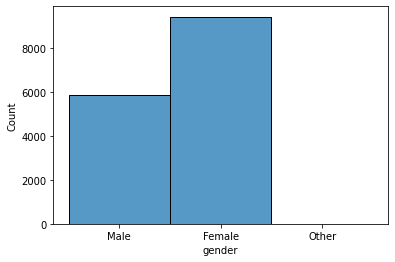

In [6]:
sns.histplot(df,x='gender')

print(      
             "Count of instantes of Female: ",   df[df['gender']=="Male"].shape[0]
      ,      "\nCount of instances of Male:   ", df[df['gender']=="Female"].shape[0]
      ,      "\nCount of instances of Others: ", df[df['gender']=="Other"].shape[0]
     )

<a id="explore-set1"></a>
## Exploring the _'avg_glucose_level', 'bmi'_ features

Text(0.5, 1.0, 'Scatterplot of BMI vs Age')

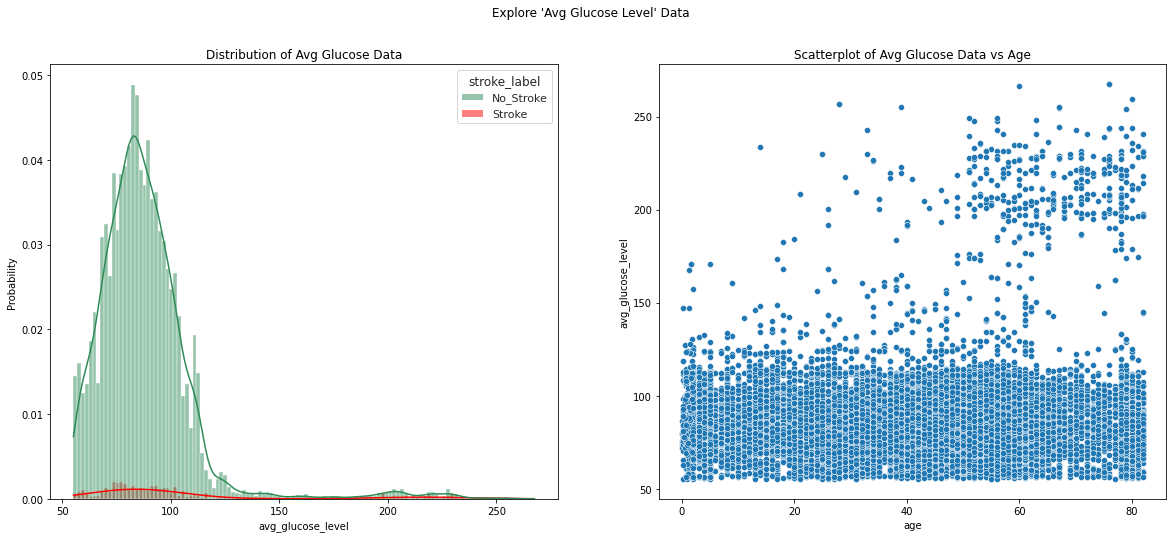

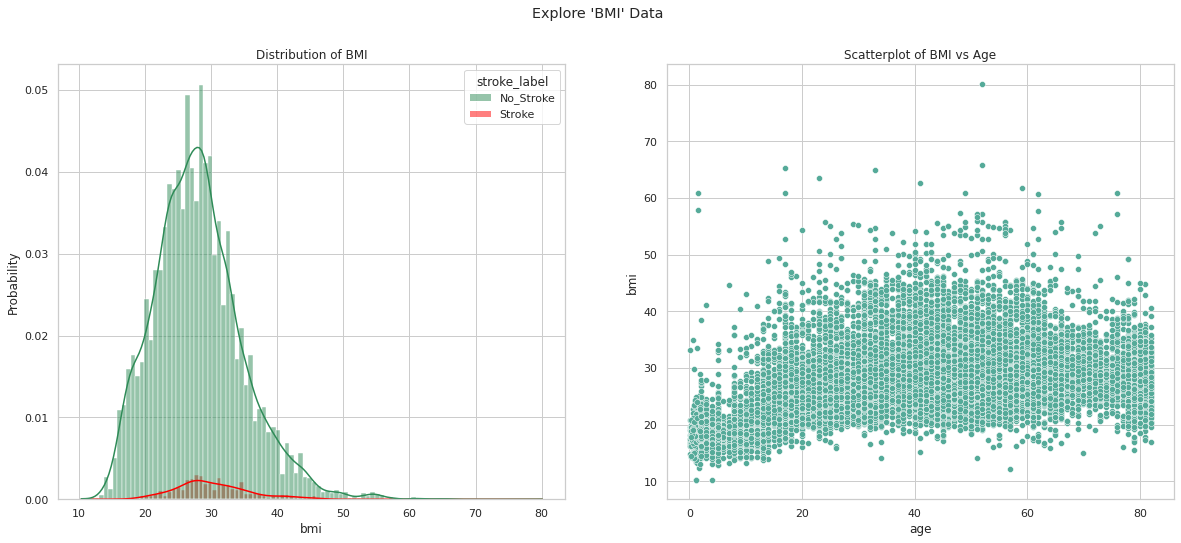

In [7]:
pal = dict(Stroke="red", No_Stroke="seagreen")
# g = sns.FacetGrid(df, hue='stroke_label', palette=pal, height=6)
# g.map(sns.histplot, "avg_glucose_level")
# g.add_legend()

fig1, axes1 = plt.subplots(1,2, figsize=(20,8))
fig1.suptitle("Explore 'Avg Glucose Level' Data")

sns.set_theme(style="whitegrid", palette='dark:#5A9_r')
sns.histplot(ax=axes1[0], data=df, x='avg_glucose_level', hue='stroke_label', palette=pal, kde=True, stat='probability')
axes1[0].set_title("Distribution of Avg Glucose Data")

sns.set_theme(style="whitegrid", palette='dark:#5A9_r')
sns.scatterplot(ax=axes1[1], x=df['age'], y=df['avg_glucose_level'])
axes1[1].set_title("Scatterplot of Avg Glucose Data vs Age")

fig2, axes2 = plt.subplots(1,2, figsize=(20,8))
fig2.suptitle("Explore 'BMI' Data")

sns.set_theme(style="whitegrid", palette='dark:#5A9_r')
sns.histplot(ax=axes2[0], data=df, x='bmi', hue='stroke_label', palette=pal, kde=True, stat='probability')
axes2[0].set_title("Distribution of BMI")

sns.set_theme(style="whitegrid", palette='dark:#5A9_r')
sns.scatterplot(ax=axes2[1], x=df['age'], y=df['bmi'])
axes2[1].set_title("Scatterplot of BMI vs Age")

<a id="explore-stats1"></a>
## Some Basic Sats
### Categories for Smoking Status:
- never smoked
- formerly smoked
- Unknown
- smokes

In [8]:
total_strokes = df[  df['stroke_label']   =="Stroke"   ].shape[0]
smokers = df[ (df['smoking_status']=="smokes") | (df['smoking_status']=="formerly smoked") ].shape[0]
smokers_with_stroke = df[ ( (df['smoking_status'] == "smokes") | 
                            (df['smoking_status'] == "formerly smoked") ) &
                          (  df['stroke_label']   == "Stroke")].shape[0]

non_smokers = df[ (df['smoking_status']=="never smoked") ].shape[0]
non_smokers_with_stroke = df[ (df['smoking_status'] == "smokes") &
                              (df['stroke_label']   == "Stroke")].shape[0]

print("-----------------------------------------------------------------------------------------"
     ,"\nCount of former or present smokers                : ", smokers
     ,"\nCount of former or present smokers who had stroke : ", smokers_with_stroke
     ,"\n"
     ,"\nCount of non-smokers                              : ", non_smokers
     ,"\nCount of non-smokers who had stroke               : ", non_smokers_with_stroke
     ,"\n-----------------------------------------------------------------------------------------"
     )

----------------------------------------------------------------------------------------- 
Count of former or present smokers                :  4480 
Count of former or present smokers who had stroke :  267 
 
Count of non-smokers                              :  6281 
Count of non-smokers who had stroke               :  108 
-----------------------------------------------------------------------------------------
